## Model Evaluation

*Keystroke dynamics* -- the analysis of typing rhythms to discriminate between different users -- has been proposed for detecting imposters (i.e., both insiders and external attackers).  Our objective is to create detectors that can discriminate users from one another based on their keystroke dynamics and assess their performance.

Our dataset contains keystroke dynamics information. Keystroke dynamics are the natural patterns that individuals exhibit when typing on a keyboard. The dataset contains samples from several individuals typing in the same password and a variety of features are measured and tabulated. The feature names are somewhat ambiguous, but they mostly represent timing information. Column names of the form `DD.key1.key2` designate the time elapsed between pressing key 1 and pressing key 2 and names of the form `UD.key1.key2` designate the time elapsed between releasing key 1 and pressing key 2. More information about the dataset and associated research can be found here: https://www.cs.cmu.edu/~keystroke/#sec2.

In [48]:
# Load standard libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [49]:
# Read data
file = 'DSL-StrongPasswordData.csv'
key_stroke_df = pd.read_csv(file)
key_stroke_df.sample(10)

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
9703,s030,3,4,0.1146,0.4177,0.3031,0.1264,0.2341,0.1077,0.1124,...,0.1420,0.3524,0.2104,0.0850,0.3341,0.2491,0.0882,0.5050,0.4168,0.0977
12206,s036,5,7,0.0430,0.6603,0.6173,0.0578,0.2543,0.1965,0.0430,...,0.0581,0.3216,0.2635,0.0438,0.5733,0.5295,0.0441,0.5946,0.5505,0.0515
19635,s056,1,36,0.0966,0.1514,0.0548,0.0776,0.1462,0.0686,0.0982,...,0.0968,0.1678,0.0710,0.0628,0.2023,0.1395,0.1245,0.2170,0.0925,0.0757
5745,s019,3,46,0.0660,0.2522,0.1862,0.0940,0.2524,0.1584,0.0555,...,0.1103,0.1732,0.0629,0.0628,0.2665,0.2037,0.0668,0.4673,0.4005,0.0987
9781,s030,4,32,0.1671,0.2156,0.0485,0.1291,0.1764,0.0473,0.1283,...,0.1003,0.1439,0.0436,0.0747,0.2921,0.2174,0.0805,0.2928,0.2123,0.0884
12764,s037,8,15,0.0868,0.0635,-0.0233,0.0813,0.1652,0.0839,0.0559,...,0.0955,0.0512,-0.0443,0.1019,0.1517,0.0498,0.1105,0.2249,0.1144,0.0839
10935,s033,3,36,0.0913,0.3062,0.2149,0.1559,0.2169,0.0610,0.1105,...,0.1805,0.1583,-0.0222,0.0987,0.2474,0.1487,0.1208,0.3172,0.1964,0.0973
20016,s057,1,17,0.0961,0.0759,-0.0202,0.0990,0.1346,0.0356,0.0791,...,0.1140,0.0932,-0.0208,0.0749,0.1677,0.0928,0.1298,0.2381,0.1083,0.1448
2323,s008,7,24,0.0715,0.1506,0.0791,0.0739,0.0771,0.0032,0.0697,...,0.1164,0.1518,0.0354,0.0959,0.0752,-0.0207,0.0732,0.1644,0.0912,0.0921
14209,s041,5,10,0.1519,0.2043,0.0524,0.1503,0.1991,0.0488,0.1556,...,0.1659,0.2894,0.1235,0.1548,0.2658,0.1110,0.1406,0.2571,0.1165,0.1316


In [50]:
# Quick analysis function 
def quick_analysis(df):
    st = '\033[1m' + 'Data types of the dataset: ' + '\033[0m' + '\n'
    st = st + str(df.dtypes)
    st = st + '\n'
    st = st + '\033[1m' + 'Number of Rows: ' + '\033[0m' + str(df.shape[0]) + '\n'
    st = st + '\033[1m' + 'Number of Columns: ' + '\033[0m' + str(df.shape[1]) + '\n'
    st = st + '\033[1m' + 'Index Range: ' + '\033[0m' + str(len(df.index)) + '\n'
    st = st + '\033[1m' + 'Column names: ' + '\033[0m' + '\n'
    
    for name in df.columns:
        st = st + str(name +', ' + '\n')
    
    #number of null values
    nv = df.isnull().sum().sum()
    st = st + '\n'
    st = st + '\033[1m' + 'Number of null values: ' + '\033[0m' + str(nv) + '\n'
    st = st + '\033[1m' + 'Mean values: ' + '\033[0m' + str(np.mean(df)) + '\n'
    st = st + '\033[1m' + 'Standard deviations: ' + '\033[0m' + str(np.std(df)) + '\n'
    st = st + '\033[1m' + 'Absolute Average Deviation (AAD): ' + '\033[0m' + str(df.mad()) + '\n'

    return st

print(quick_analysis(key_stroke_df.drop(['subject'], axis='columns')))
...    

Data types of the dataset: 
sessionIndex         int64
rep                  int64
H.period           float64
DD.period.t        float64
UD.period.t        float64
H.t                float64
DD.t.i             float64
UD.t.i             float64
H.i                float64
DD.i.e             float64
UD.i.e             float64
H.e                float64
DD.e.five          float64
UD.e.five          float64
H.five             float64
DD.five.Shift.r    float64
UD.five.Shift.r    float64
H.Shift.r          float64
DD.Shift.r.o       float64
UD.Shift.r.o       float64
H.o                float64
DD.o.a             float64
UD.o.a             float64
H.a                float64
DD.a.n             float64
UD.a.n             float64
H.n                float64
DD.n.l             float64
UD.n.l             float64
H.l                float64
DD.l.Return        float64
UD.l.Return        float64
H.Return           float64
dtype: object
Number of Rows: 20400
Number of Columns: 33
Index Range: 20400
Colu

Ellipsis

## Question 1:
Apply your `quick_analysis` function and other data exploratory methods to the dataset...

In [5]:
# find the number of unique values in the subject column
pd.unique(key_stroke_df.subject).shape[0]

51

## Question 2
Convert the values in the `subject` column, which are of type 'str' into corresponding integers... What is the sum of all of the values in the 'subject' column?

In [51]:
format = lambda x: int(x.lstrip(x[0]))
key_stroke_df['subject'] = key_stroke_df['subject'].apply(format)  
np.sum(key_stroke_df['subject'])

622000

In [7]:
key_stroke_df.sample(3)

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
11949,35,7,50,0.0536,0.1627,0.1091,0.0997,0.1625,0.0628,0.0604,...,0.0895,0.0684,-0.0211,0.0736,0.1427,0.0691,0.1013,0.2486,0.1473,0.0995
7318,24,3,19,0.0679,0.2130,0.1451,0.0491,0.1695,0.1204,0.0478,...,0.0707,0.0557,-0.0150,0.0652,0.2676,0.2024,0.0628,0.2799,0.2171,0.0591
14248,41,5,49,0.1754,0.1861,0.0107,0.1290,0.1744,0.0454,0.1264,...,0.2016,0.1475,-0.0541,0.1380,0.1799,0.0419,0.1546,0.3006,0.1460,0.1100


## Question 3:

Delete the DataFrame columns labeled `sessionIndex` and `rep`.  Then, extract the feature and target information from the new DataFrame and convert each to a numpy array...

In [52]:
# drop unnecessary columns
key_stroke_df = key_stroke_df.drop(['sessionIndex','rep'], axis='columns')
key_stroke_df.head(3)

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,2,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,2,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945


In [53]:
# extract features and target attributes and 
# convert data to numpy arrays
features = key_stroke_df.iloc[:,1:32].to_numpy()  
target = key_stroke_df.subject.to_numpy()
features.shape

(20400, 31)

In [10]:
target

array([ 2,  2,  2, ..., 57, 57, 57], dtype=int64)

## Question 4
Standardize the `features` array and name the resultant array `features_standardized`.  What is the mean value of the column that corresponds to the H.period feature in the features_standardized array? Choose the closest value.

In [54]:
# standardize the features array using sklearn standard scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# mean value of H.period
val = np.mean(features_standardized[:, 0:1])

In [12]:
print('The mean of the values in the `H.period` column is {0:0.4f}'.format(val ))

The mean of the values in the `H.period` column is -0.0000


In [13]:
# another way
np.mean(features_standardized, axis =0)[0]

-1.4489498925304005e-16

In [126]:
# visual check on the standadized features, column 0
features_standardized[:, 0:1]

array([[ 1.88089501],
       [ 0.59818883],
       [ 1.33068157],
       ...,
       [ 0.01759551],
       [-0.03641317],
       [-1.14021559]])

## Question 5
We want to create classifier models that can distinguish between users based on keystroke dynamic features. Use the standardized features array and target array for this purpose. The target array will serve as the 'labels' that will be used to train and test our models.

Split the data into training and test sets using sklearn `train_test_split` function. Set test_size = 0.2, and the random_state = 7.

How many observations are in your training set?

In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features_standardized, target, test_size=0.2, random_state=7)   

In [15]:
print('There are {} observations in the training set'.format(str(np.size(features_train, axis=0))))

There are 16320 observations in the training set


## Question 6
Create a simple baseline classifier to compare with our classifier models. Use `strategy = 'most_frequent'` to generate predictions of 'subject' based on keystroke dynamics. What is the prediction accuracy using this naive approach?

In [56]:
# Load libraries
from sklearn.dummy import DummyClassifier

# create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score. Scaore returns the mean accuracy on the given test data and labels
dummy.score(features_test, target_test)

0.0125

In [15]:
# splitting the data first and then standardize
# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=7)


# Fit standardizer to training set
scaler.fit(features_train)

# Apply to both training and test sets
features_train_std = scaler.transform(features_train)
features_test_std = scaler.transform(features_test)

# "Train" model
dummy.fit(features_train_std, target_train)

# Get accuracy score
dummy.score(features_test_std, target_test)

0.0125

As we expected, since the dummy classifier does not take into account the training set, both results are the same 

## Question 7
Create a decision tree classifier to predict the 'subject' based on keystroke dynamics. Use the default parameters with the exception of `random_state = 7`. What is the prediction accuracy using this model? ...

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Create classifier
classifier = DecisionTreeClassifier(random_state = 7)

# Train model with the standardized data
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(features_test, target_test)   

0.7200980392156863

## Question 8
Create a random forest classifier to predict the 'subject' based on keystroke dynamics. Use the default parameters with the exception of `random_state = 7` and `n_jobs = -1`. What is the prediction accuracy using this model?

In [58]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create classifier
rf_classifier = RandomForestClassifier(random_state = 7, n_jobs = -1 )

# Train model with the standardized data
rf_classifier.fit(features_train, target_train)

# Get accuracy score
rf_classifier.score(features_test, target_test)

# Calculate accuracy
accuracy_score(target_test, rf_classifier.predict(features_test))

0.9284313725490196

## Question 9
Using the method discussed in the guided exercise on Trees and Forests, determine the most important features identified by the random forest model. Which of the following statements is true?

Index(['H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i',
       'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five',
       'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o',
       'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n',
       'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return',
       'H.Return'],
      dtype='object')


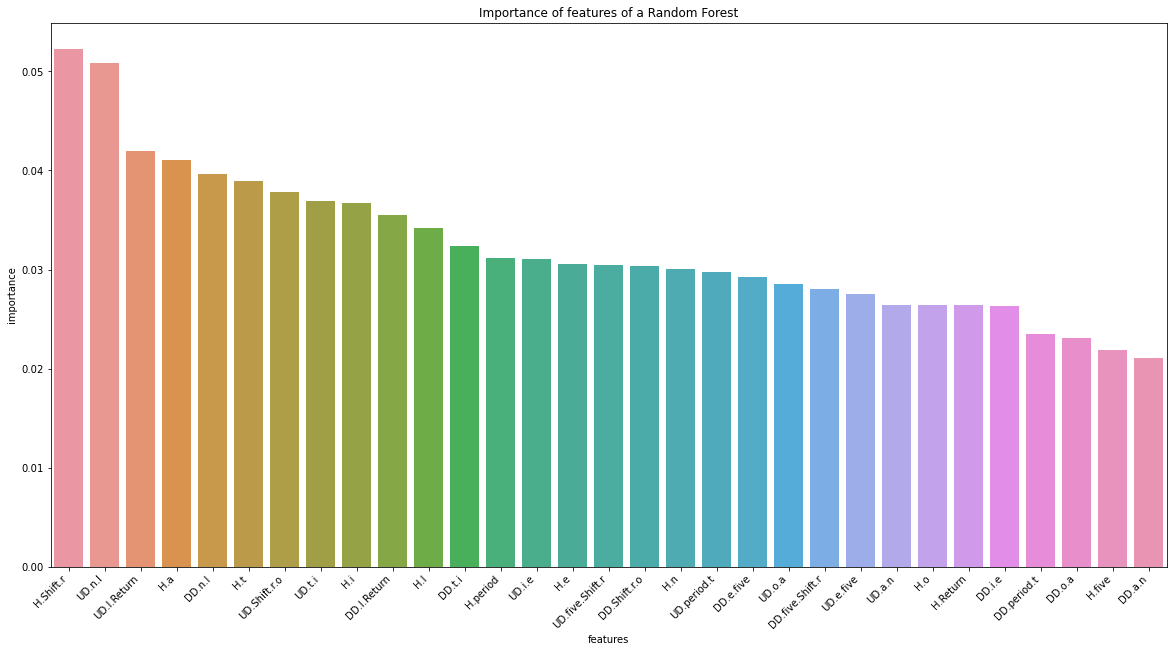

In [23]:
# recover the names of the features in the `features_standardized` 
# array from the original DataFrame

names = key_stroke_df.columns[1:]
print(names)

importances = rf_classifier.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

key_stroke_df2 = key_stroke_df.drop(['subject'], axis='columns')

# trying the barchart with seaborn
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=key_stroke_df2.columns[sorted_indices], y=importances[sorted_indices])
ax.set(title='Importance of features of a Random Forest')
ax.set(xlabel='features')
ax.set(ylabel='importance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

From the chart we observe that **'H.Shift.r'** is more important than **'DD.period.t'**

In [142]:
# 'H.five' is more important than 'H.a'
print(importances[names.get_loc('H.five')] > importances[names.get_loc('H.a')])
# 'H.Return' is more important than 'DD.l.Return'
print(importances[names.get_loc('H.Return')] > importances[names.get_loc('DD.l.Return')])
# 'H.Shift.r' is more important than 'DD.period.t'
print(importances[names.get_loc('H.Shift.r')] > importances[names.get_loc('DD.period.t')])
# 'UD.e.five' is more important than 'H.n'
print(importances[names.get_loc('UD.e.five')] > importances[names.get_loc('H.n')])
# 'DD.period.t' is more important than 'H.Shift.r'
print(importances[names.get_loc('DD.period.t')] > importances[names.get_loc('H.Shift.r')])

False
False
True
False
False


## Question 10

Evaluate the change in performance of the random forest model if we restrict the number of features to those most important by thresholding. Using the method discussed in the guided exercise on Trees and Forests, retrain the random forest model using only the most important features. Do this by setting the `threshold = 0.04` in the `SelectFromModel` transformer (This will retain about 4 features). Which of the following statements is true?

In [25]:
# Load library
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(rf_classifier, threshold=0.04)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features_train, target_train)

# Train random forest using most important features
model = rf_classifier.fit(features_important, target_train)

# see the features that were selected
selected_features = selector.get_feature_names_out(names)

# get the new feature_test set with the 4 selected features
f1 =names.get_loc(selector.get_feature_names_out(names)[0])
f2 =names.get_loc(selector.get_feature_names_out(names)[1])
f3 =names.get_loc(selector.get_feature_names_out(names)[2])
f4 =names.get_loc(selector.get_feature_names_out(names)[3])
fetures_test_inmportant= features_test[:, [f1, f2, f3, f4]]
    
# Get accuracy score
rf_classifier.score(fetures_test_inmportant, target_test)


0.5634803921568627

In [26]:
selector.get_feature_names_out(names)
f1 =names.get_loc(selector.get_feature_names_out(names)[0])
f2 =names.get_loc(selector.get_feature_names_out(names)[1])
f3 =names.get_loc(selector.get_feature_names_out(names)[2])
f4 =names.get_loc(selector.get_feature_names_out(names)[3])

In [29]:
selector.get_feature_names_out(names)

array(['H.Shift.r', 'H.a', 'UD.n.l', 'UD.l.Return'], dtype=object)

## Question 11
Our cyber security team has identified subject `s002` as an insider threat, based on various abnormal indicators. Our goal is to create a binary classifier that detects s002's signature. Observations with features that correspond to s002 are considered abnormal. All other observations are considered normal. For classifier modeling, use the same `features_standardized` feature matrix from earlier, but transform the target vector to have values of either 0 or 1. If the user in the target vector is s002 label that observation a '0'. All other observations should have a class designation of '1'. You might find it better to make these assignments as integers vice strings.

We want to compare two binary classifiers, a random forest classifier (Model A) and a nearest neighbor classifier (Model B). A nearest neighbor classifier predicts the class of an observation based on the class of its neighbors. Note: you'll need to load the following library: `from sklearn.neighbors import KNeighborsClassifier`

In training the new models, split the data into training and test sets using sklearn. Set `test_size = 0.2`, and the `random_state = 7`.

For training the KNeighborsClassifier, set `n_neighbors = 3`.

Plot the receiver operating characteristic curve for each classifier and report which model is preferred. Base your decision on the area under the curve method  

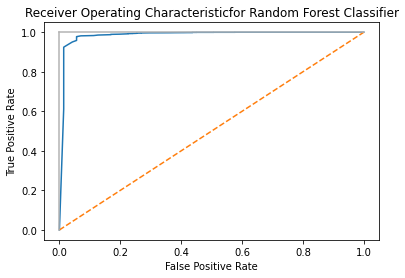

Accuracy of Model A (Random Forest classifier): 0.9899509803921569 Accuracy of Model B (K-nearest classifier): 0.9911764705882353


In [44]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: transform target into a binary set
target2 = list ()
for x in target:
    if x == 2:
        target2.append(0)
    else:
        target2.append(1)

bin_target = np.array(target2)


# Step 2: split the data first and then standardize
# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, bin_target, test_size=0.2, random_state=7)


# Fit standardizer to training set
scaler.fit(features_train)

# Apply to both training and test sets
features_train_std = scaler.transform(features_train)
features_test_std = scaler.transform(features_test)

# Step 3: create the Random forest Classifier
rf_classifier = RandomForestClassifier(random_state = 7, n_jobs = -1 )

# Train model with the standardized data
rf_classifier.fit(features_train_std, target_train)

# Get accuracy score
rf_accuracy=rf_classifier.score(features_test_std, target_test)

# Step 4: create a nearest neighbor classifier
kn_classifier = KNeighborsClassifier(n_neighbors = 3 )
           
# Train model with the standardized data
kn_classifier.fit(features_train_std, target_train)

# Get accuracy score
kn_accuracy = kn_classifier.score(features_test_std, target_test)

# Create true and false positive rates for ramdom forest
target_hat = rf_classifier.predict_proba(features_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                               target_hat)

# Plot ROC curve
plt.title("Receiver Operating Characteristicfor Random Forest Classifier")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()
print('Accuracy of Model A (Random Forest classifier): {} Accuracy of Model B (K-nearest classifier): {}'.format(rf_accuracy, kn_accuracy) )

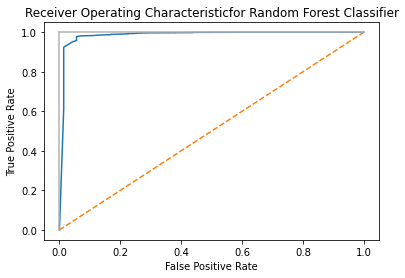

Accuracy of Model A (Random Forest classifier): 0.9899509803921569 Accuracy of Model B (K-nearest classifier): 0.9904411764705883


In [37]:
#  option b: standardize features and then split the data
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: transform target into a binary set
target2 = list ()
for x in target:
    if x == 2:
        target2.append(0)
    else:
        target2.append(1)

bin_target = np.array(target2)

# Step 2: split the data first and then standardize
# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features_standardized, bin_target, test_size=0.2, random_state=7)

# Step 3: create the Random forest Classifier
rf_classifier = RandomForestClassifier(random_state = 7, n_jobs = -1 )

# Train model with the standardized data
rf_classifier.fit(features_train, target_train)

# Get accuracy score
rf_accuracy=rf_classifier.score(features_test, target_test)

# Step 4: create a nearest neighbor classifier
kn_classifier = KNeighborsClassifier(n_neighbors = 3 )
           
# Train model with the standardized data
kn_classifier.fit(features_train, target_train)

# Get accuracy score
kn_accuracy = kn_classifier.score(features_test, target_test)

# Create true and false positive rates for ramdom forest
target_hat = rf_classifier.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                               target_hat)

# Plot ROC curve
plt.title("Receiver Operating Characteristicfor Random Forest Classifier")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()
print('Accuracy of Model A (Random Forest classifier): {} Accuracy of Model B (K-nearest classifier): {}'.format(rf_accuracy, kn_accuracy) )

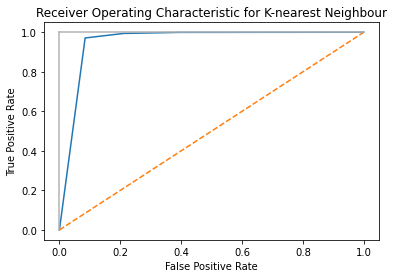

In [40]:
# Create true and false positive rates for k-nn
target_hat = kn_classifier.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                               target_hat)

# Plot ROC curve
plt.title("Receiver Operating Characteristic for K-nearest Neighbour")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [61]:
rf_classifier.predict_proba(features_test)

array([[0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ]])

Base on the area under the ROC curve, **RF classifier (Model A)** seems a better option to identify the insider threat. However **Model B** has a better accuracy (0.9911). A binay dummy classifier woud predict `not_insider` with accuracy of 98.25%, so model A only performs a little better than the dummy.

## Challenge Question (add 3 extra points to final grade)
Using the integer-valued `target` vector and the `features_standardized` matrix to develop an 'improved' multiclass classification model, that can be used to distinguish users from one another.  You can use any of the supervised-learning approaches offered in `sklearn` and you can adjust hyperparameters as desired.  Use accuracy to measure your model's performance.

I will create a forum in Sakai, please post the type of "model" employed (i.e., random forest, nearest neighbor, svm) and the highest accuracy achieved.

    Example:    Decision Tree: accuracy = 0.994 

Some ideas can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

### Have fun!!!



In [73]:
# let's try a logistic regression
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features_standardized, target, test_size=0.2, random_state=7)  

# Create logistic regression
logit = LogisticRegression()

# Train model with the standardized data
logit.fit(features_train, target_train)

# Get accuracy score
logit_accuracy=logit.score(features_test, target_test)
logit_accuracy

C:\Users\UACIS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8313725490196079

In [59]:
# let's try a decission tree
# Load libraries
from sklearn.tree import DecisionTreeClassifier

# Create dt regression
dt_csf = DecisionTreeClassifier(max_depth =30)

# Train model with the standardized data
dt_csf.fit(features_train, target_train)

# Get accuracy score
dt_csf_accuracy=dt_csf.score(features_test, target_test)
dt_csf_accuracy

0.7156862745098039

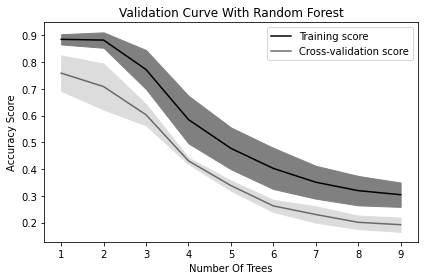

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Create svc classifier
svc_csf = SVC()

# Train model with the standardized data
svc_csf.fit(features_train, target_train)

# Get accuracy score
svc_csf_accuracy=svc_csf.score(features_test, target_test)
svc_csf_accuracy

# Create range of values for parameter
#param_range = list['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
param_range = np.arange(1, 10, 1)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    SVC(kernel = 'poly'),
    # Feature matrix
    features_standardized,
    # Target vector
    target,
    # Hyperparameter to examine
    param_name="degree",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With SVC")
plt.xlabel("Number Of Polynomial degrees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [60]:
from sklearn.svm import SVC

# Create svc classifier
svc_csf = SVC(kernel = 'rbf')

# Train model with the standardized data
svc_csf.fit(features_train, target_train)

# Get accuracy score
svc_csf_accuracy=svc_csf.score(features_test, target_test)
svc_csf_accuracy


0.8818627450980392

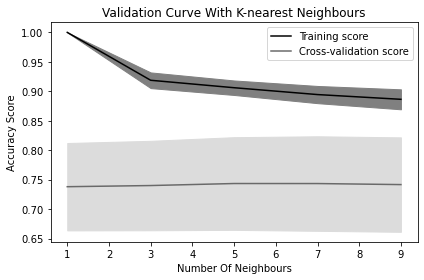

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Create svc classifier
kn_csf = KNeighborsClassifier()

# Train model with the standardized data
#kn_csf.fit(features_train, target_train)

# Get accuracy score
#kn_csf_accuracy=kn_csf.score(features_test, target_test)
#kn_csf_accuracy

# Create range of values for parameter
#param_range = list['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
param_range = np.arange(1, 11, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    kn_csf,
    # Feature matrix
    features_standardized,
    # Target vector
    target,
    # Hyperparameter to examine
    param_name="n_neighbors",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With K-nearest Neighbours")
plt.xlabel("Number Of Neighbours")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [64]:
train_mean

array([1.        , 0.91870098, 0.90605392, 0.89443627, 0.88637255])

In [68]:
# Create svc classifier
kn_csf = KNeighborsClassifier(n_neighbors =9)

# Train model with the standardized data
kn_csf.fit(features_train, target_train)

# Get accuracy score
kn_csf_accuracy=kn_csf.score(features_test, target_test)
kn_csf_accuracy

0.8392156862745098

In [72]:
kn_csf.predict(features_test)

array([32, 39,  7, ..., 37,  3, 11], dtype=int64)

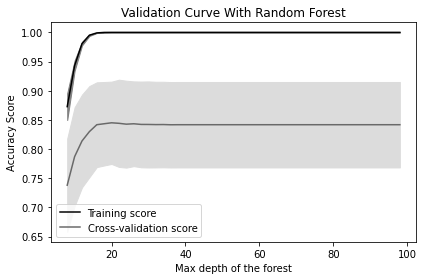

In [87]:
# try a random forest classifier
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

# Create classifier
rf_classifier = RandomForestClassifier(random_state = 7, n_jobs = -1 )

# Train model with the standardized data
#rf_classifier.fit(features_train, target_train)

# Get accuracy score
#rf_classifier.score(features_test, target_test)

# Calculate accuracy
#accuracy_score(target_test, rf_classifier.predict(features_test))


param_range = np.arange(8,100, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    rf_classifier,
    # Feature matrix
    features_standardized,
    # Target vector
    target,
    # Hyperparameter to examine
    param_name="max_depth",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Max depth of the forest")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [85]:
# Create classifier
rf_classifier = RandomForestClassifier(random_state = 7, n_jobs = -1, max_depth = 23 )

# Train model with the standardized data
rf_classifier.fit(features_train, target_train)

# Get accuracy score
rf_classifier.score(features_test, target_test)

# Calculate accuracy
accuracy_score(target_test, rf_classifier.predict(features_test))

0.9343137254901961